In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./2020_data.csv', index_col=0)
display(df.head(100))

,forward_RE,forward_FC,UP,DW,production_RE,production_FC,Offshore DK2,Offshore DK1,Onshore DK2,Onshore DK1
0,28.32,35.395866,28.32,28.32,0.995098,1.000000,0.274701,0.506045,0.680247,0.659599
1,10.07,35.127035,10.07,10.07,1.000000,1.000000,0.356135,0.541451,0.796296,0.671060
2,-4.08,-3.707266,-4.08,-4.08,1.000000,0.776486,0.279045,0.219344,0.728395,0.638109
3,-9.91,-17.375766,-9.91,-9.91,0.995098,0.935938,0.228013,0.201209,0.698765,0.619771
4,-7.41,-7.552286,-7.41,-7.41,1.000000,1.000000,0.221498,0.201209,0.690123,0.604011
...,...,...,...,...,...,...,...,...,...,...
95,31.41,31.575463,31.41,31.41,0.970588,0.890949,0.296417,0.438687,0.381481,0.633524
96,26.90,23.701065,26.90,26.90,0.970588,0.905371,0.307275,0.535406,0.432099,0.637249
97,25.12,28.858259,25.12,25.12,0.946078,1.000000,0.300760,0.531952,0.417284,0.611748
98,24.12,-40.398465,24.12,24.12,0.735294,0.483009,0.293160,0.514680,0.400000,0.570201


34.10451312785388
40.28497089041095
28.93079908675799


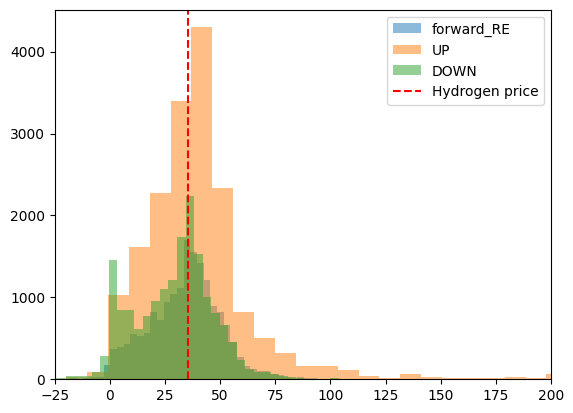

In [14]:
# Investigate the UP and DOWN columns (mean, distribution, etc.)
print(df['forward_RE'].mean())
print(df['UP'].mean())
print(df['DW'].mean())

# Plot the distribution of UP and DOWN
plt.figure()
plt.hist(df['forward_RE'], bins=100, alpha=0.5, label='Forward_price')
plt.hist(df['UP'], bins=100, alpha=0.5, label='Up')
plt.hist(df['DW'], bins=100, alpha=0.5, label='Down')
# Add a vertical line for the price of hydrogen (35.2 €/MWh)
plt.axvline(x=35.2, color='r', linestyle='--', label='Hydrogen price')
plt.xlim(-25, 200)
plt.legend(loc='upper right')
plt.show()

In [12]:
nb_hours_balanced = df[df['UP'] == df['DW']].shape[0]
print(f"Total number of hours: {df.shape[0]}")
print(f'Number of hours with balanced UP and DOWN: {nb_hours_balanced}')
print(f'Number of hours with a lack of electricity: {df[df["UP"] > df["forward_RE"]].shape[0]}')
print(f'Number of hours with a surplus of electricity: {df[df["DW"] < df["forward_RE"]].shape[0]}')

Total number of hours: 17520
Number of hours with balanced UP and DOWN: 6044
Number of hours with a lack of electricity: 4303
Number of hours with a surplus of electricity: 7173
